Herman Huff

Springboard Data Science Capstone Project I

# <center> Capstone Project I </center>

## Introduction
Problem Statement: Exploring the impact of socioeconomic features on heart disease prediction in US zip codes.

#### Background

Heart disease is the leading cause of death in the United States, causing more than 600,000 deaths annually. This project will examine various risk factors for heart disease and seek to determine which combination of factors optimally predict heart disease prevalence per zip code. The project will focus on zip codes within the largest 500 cities in the US, as health data is available for these zip codes through the CDC’s 500 Cities project. Additionally, socioeconomic and fast food restaurant datasets will be incorporated.

#### Impact

This model can help to increase preventative and interventional efforts by identifying new socioeconomic features of heart disease and quantifying the impact of previously known socioeconomic features. This is beneficial to legislature and organizations seeking to decrease the prevalence of heart disease by giving them new targets to work on and helping to quantify their efforts.

#### Datasets

##### 500 Cities: Local Data for Better Health

This dataset comes from the CDC’s collaborative project that provides small area estimates for disease risk factors, outcomes and preventative service use. The project delivers data for the 497 largest cities in America and represents approximately one-hundred million people, approximately 33% of the US population. There are 810103 entries, each representing a measure of health data for a census tract. There are 24 columns specifying features of these measures. Some useful features include geographic area information and population counts.

##### HUD-USPS ZIP Crosswalk Files

This is a dataset maintained by the US Department of Housing and Development. It contains census tracts and their corresponding zip codes. It is created using the 2010 census data along with USPS Vacancy Data, which is updated quarterly. It should be noted that some census tracts are within multiple zip codes and this will be addressed during data wrangling.


##### fastfoodmaps.com

This is a dataset that provides locations of fast food restaurants all over the US. It was built in 2007 and authored by Phil Dhingra, using website scrapers to extract information. It provides geographic information for 50,000 fast food restaurants. We make the assumption that the number and location of these restaurants has not changed enough over the years to significantly impact the results. 

##### Uszipcode

This is a zip code database authored by Sanhe Hu. It provides a rich set of data for US zip codes including geographic, demographic, real estate, socioeconomic and education information. Scrapers are used to retrieve from multiple active data sources to maintain this database.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
sns.set()

from IPython.display import display, HTML
import warnings
warnings.filterwarnings('ignore')

# Data Wrangling

### 500 Cities Dataset
 
The 500 cities dataset is loaded into a Panda’s dataframe to reveal 810103 entries and 24 columns.

In [2]:
dfh18 = pd.read_csv("500_Cities__Local_Data_for_Better_Health__2018_release.csv")

In [3]:
#Display dataframe
display(dfh18.head())
display(dfh18.info())

,Year,StateAbbr,StateDesc,CityName,GeographicLevel,DataSource,Category,UniqueID,Measure,Data_Value_Unit,...,High_Confidence_Limit,Data_Value_Footnote_Symbol,Data_Value_Footnote,PopulationCount,GeoLocation,CategoryID,MeasureId,CityFIPS,TractFIPS,Short_Question_Text
0,2016,US,United States,NaN,US,BRFSS,Prevention,59,Current lack of health insurance among adults ...,%,...,14.9,NaN,NaN,308745538,NaN,PREVENT,ACCESS2,NaN,NaN,Health Insurance
1,2016,US,United States,NaN,US,BRFSS,Prevention,59,Current lack of health insurance among adults ...,%,...,11.8,NaN,NaN,308745538,NaN,PREVENT,ACCESS2,NaN,NaN,Health Insurance
2,2016,US,United States,NaN,US,BRFSS,Health Outcomes,59,Arthritis among adults aged >=18 Years,%,...,23.2,NaN,NaN,308745538,NaN,HLTHOUT,ARTHRITIS,NaN,NaN,Arthritis
3,2016,US,United States,NaN,US,BRFSS,Health Outcomes,59,Arthritis among adults aged >=18 Years,%,...,25.6,NaN,NaN,308745538,NaN,HLTHOUT,ARTHRITIS,NaN,NaN,Arthritis
4,2016,US,United States,NaN,US,BRFSS,Unhealthy Behaviors,59,Binge drinking among adults aged >=18 Years,%,...,18.2,NaN,NaN,308745538,NaN,UNHBEH,BINGE,NaN,NaN,Binge Drinking


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810103 entries, 0 to 810102
Data columns (total 24 columns):
Year                          810103 non-null int64
StateAbbr                     810103 non-null object
StateDesc                     810103 non-null object
CityName                      810047 non-null object
GeographicLevel               810103 non-null object
DataSource                    810103 non-null object
Category                      810103 non-null object
UniqueID                      810103 non-null object
Measure                       810103 non-null object
Data_Value_Unit               810103 non-null object
DataValueTypeID               810103 non-null object
Data_Value_Type               810103 non-null object
Data_Value                    787311 non-null float64
Low_Confidence_Limit          787311 non-null float64
High_Confidence_Limit         787311 non-null float64
Data_Value_Footnote_Symbol    22794 non-null object
Data_Value_Footnote           22794 non-

None

Many of the columns contain redundant information: ‘StateAbbr (two letter state abbreviation) and ‘StateDesc’ (full state name), ‘Category’ (health category abbreviation) and ‘Short_Question_Text’ (health category unabbreviated). Additionally, the columns ‘DataSource’, ‘UniqueID’, ‘DataValueTypeID’, and ‘Data_Value_Footnote_Symbol’ contain information that won’t be useful for our analysis. These columns are dropped.

In [4]:
#Filter for desired columns, remove redundant columns and rename columns
dfh18 = dfh18[['Year', 'GeographicLevel', 'StateDesc', 'CityName','Short_Question_Text','Measure','Data_Value_Type', 
               'Data_Value','Low_Confidence_Limit', 'High_Confidence_Limit','PopulationCount','GeoLocation',
               'CityFIPS','TractFIPS']]
dfh18.columns = ["Year","GeographicLevel","State","City","Category","Measure","Data_Type",
                  "Data_Value","Low_Confidence_Limit","High_Confidence_Limit","Population","Tract GeoLocation",
                  "CityFIPS","TractFIPS"]

Each row contains an estimate for some health metric at the city or census tract level. For our analysis, we are interested in census tract rows, so the ‘GeographicLevel’ column is filtered to show only rows at the census tract level.

In [5]:
# Filter out rows at the US or City level
dfh18 = dfh18.loc[dfh18["GeographicLevel"] == "Census Tract"]

Finally, some rows do not contain our metric of interest (heart disease prevalence) due to population size being too small, so these rows are dropped along with the ‘Data_Value_Footnote’ column which contains a note mentioning this.

In [6]:
# Remove rows with no data value
dfh18 = dfh18.loc[dfh18.Data_Value.notnull()]

We filter to show only rows related to our metric of interest. To do this, the ‘Measure’ column is filtered to contain only heart disease prevalence and the prevalences of risk factors for heart disease. These include hypertension, high cholesterol, smoking, diabetes, sedentarism and obesity.

In [7]:
#Filter values related to heart disease
dfh18 = dfh18.loc[dfh18["Measure"].isin(['High blood pressure among adults aged >=18 Years',
                                         'Coronary heart disease among adults aged >=18 Years',
                                         'High cholesterol among adults aged >=18 Years who have been screened in the past 5 Years',
                                         'Current smoking among adults aged >=18 Years',
                                         'Diagnosed diabetes among adults aged >=18 Years',
                                         'No leisure-time physical activity among adults aged >=18 Years',
                                         'Obesity among adults aged >=18 Years'])]

In [8]:
# Store values in separate variables
smoking = dfh18.loc[dfh18["Category"] == "Current Smoking"]
hypertension = dfh18.loc[dfh18["Category"] == "High Blood Pressure"]
obesity = dfh18.loc[dfh18["Category"] == "Obesity"]
sedentery = dfh18.loc[dfh18["Category"] == "Physical Inactivity"]
cholesterol = dfh18.loc[dfh18["Category"] == "High Cholesterol"]
diabetes = dfh18.loc[dfh18["Category"] == "Diabetes"]
heartd = dfh18.loc[dfh18["Category"] == "Coronary Heart Disease"]

### HUD-USPS ZIP Crosswalk Files
 
The columns ‘zip’ (containing the zip code), ‘tract’ (containing the census tract) and ‘res_ratio’ (containing the percentage of census tract residents who reside in this zip code) are selected and stored. 

In [9]:
# Read zip-to-tract conversion file
tractzip = pd.read_excel("Tract-zip.xlsx")

# Extract desired columns
tractzip = tractzip[["zip","tract","res_ratio"]]
display(tractzip.head())

,zip,tract,res_ratio
0,36067,1001020100,1.000000
1,36067,1001020200,1.000000
2,36067,1001020300,1.000000
3,36067,1001020400,0.025014
4,36066,1001020400,0.974986


The resulting dataframe is grouped by tract and the row with the maximum value of ‘res_ratio’ is selected for each tract. This is then merged back in with the original crosswalk df so that only one zip code, where most of the tract’s population resides, is represented for each tract.

In [10]:
# Group by tracts and select rows with the greatest resident percentage
tractgroups = tractzip.groupby("tract")["res_ratio"].max().reset_index()

# Merge tract groups with the original df containing zip codes
# resulting in one zip code per tract
tractzipm = pd.merge(tractzip,tractgroups, how="inner")
tractzipm.columns = ["Zip Code","tract","res_ratio"]
tractzipm = tractzipm[["Zip Code","tract"]]

display(tractzipm.head())
display(tractzipm.info())

,Zip Code,tract
0,36067,1001020100
1,36067,1001020200
2,36067,1001020300
3,36066,1001020400
4,36066,1001020500


<class 'pandas.core.frame.DataFrame'>
Int64Index: 73659 entries, 0 to 73658
Data columns (total 2 columns):
Zip Code    73659 non-null int64
tract       73659 non-null int64
dtypes: int64(2)
memory usage: 1.7 MB


None

### Merging 500 Cities and Zip Crosswalk
 
The crosswalk dataframe is merged with each of the health prevalences individually. 

In [11]:
# Merge health values with conversion dataframe
smokingm = pd.merge(smoking,tractzipm,how="inner",left_on="TractFIPS",right_on="tract")
hypertensionm = pd.merge(hypertension,tractzipm,how="inner",left_on="TractFIPS",right_on="tract")
obesitym = pd.merge(obesity,tractzipm,how="inner",left_on="TractFIPS",right_on="tract")
sedenterym = pd.merge(sedentery,tractzipm,how="inner",left_on="TractFIPS",right_on="tract")
cholesterolm = pd.merge(cholesterol,tractzipm,how="inner",left_on="TractFIPS",right_on="tract")
diabetesm = pd.merge(diabetes,tractzipm,how="inner",left_on="TractFIPS",right_on="tract")
heartdm = pd.merge(heartd,tractzipm,how="inner",left_on="TractFIPS",right_on="tract")

A weighted mean prevalence is obtained by grouping by zip code and weighting each tract’s prevalence by its population. This is applied to heart disease and all its risk factors individually. Finally, all risk factor prevalences are merged into a single dataframe along with heart disease prevalence.

In [12]:
# Group by zip code for each value and calculate weighted mean prevalence
smokingmp = smokingm.groupby("Zip Code").apply(lambda x: np.average(x['Data_Value'].astype("float"),weights=x['Population'])).reset_index()
smokingmp.columns = ["Zip Code","Smoking Prevalence"]

hypertensionmp = hypertensionm.groupby("Zip Code").apply(lambda x: np.average(x['Data_Value'].astype("float"),weights=x['Population'])).reset_index()
hypertensionmp.columns = ["Zip Code","Hypertension Prevalence"]

obesitymp = obesitym.groupby("Zip Code").apply(lambda x: np.average(x['Data_Value'].astype("float"),weights=x['Population'])).reset_index()
obesitymp.columns = ["Zip Code","Obesity Prevalence"]

sedenterymp = sedenterym.groupby("Zip Code").apply(lambda x: np.average(x['Data_Value'].astype("float"),weights=x['Population'])).reset_index()
sedenterymp.columns = ["Zip Code","Sedentarism Prevalence"]

cholesterolmp = cholesterolm.groupby("Zip Code").apply(lambda x: np.average(x['Data_Value'].astype("float"),weights=x['Population'])).reset_index()
cholesterolmp.columns = ["Zip Code","Cholesterol Prevalence"]

diabetesmp = diabetesm.groupby("Zip Code").apply(lambda x: np.average(x['Data_Value'].astype("float"),weights=x['Population'])).reset_index()
diabetesmp.columns = ["Zip Code","Diabetes Prevalence"]

heartdmp = heartdm.groupby("Zip Code").apply(lambda x: np.average(x['Data_Value'].astype("float"),weights=x['Population'])).reset_index()
heartdmp.columns = ["Zip Code","Heart Disease Prevalence"]

#Merge the values
_ = pd.merge(smokingmp,hypertensionmp, on="Zip Code")
_ = pd.merge(_,obesitymp, on="Zip Code")
_ = pd.merge(_,sedenterymp, on="Zip Code")
_ = pd.merge(_,cholesterolmp, on="Zip Code")
_ = pd.merge(_,diabetesmp, on="Zip Code")
datameans = pd.merge(_,heartdmp, on="Zip Code")

display(datameans.head())
display(datameans.info())

,Zip Code,Smoking Prevalence,Hypertension Prevalence,Obesity Prevalence,Sedentarism Prevalence,Cholesterol Prevalence,Diabetes Prevalence,Heart Disease Prevalence
0,1101,28.300000,36.400000,44.000000,46.600000,41.300000,19.300000,9.300000
1,1104,24.269272,33.257045,37.437441,37.721353,38.392990,14.837576,8.816472
2,1105,28.596151,32.879892,42.176132,43.694299,37.409454,15.840128,7.849705
3,1107,25.495498,31.912761,41.052003,44.608772,38.631033,16.712049,8.234889
4,1108,23.844497,30.236068,35.381122,34.251449,35.500119,12.581968,6.943035


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4793 entries, 0 to 4792
Data columns (total 8 columns):
Zip Code                    4793 non-null int64
Smoking Prevalence          4793 non-null float64
Hypertension Prevalence     4793 non-null float64
Obesity Prevalence          4793 non-null float64
Sedentarism Prevalence      4793 non-null float64
Cholesterol Prevalence      4793 non-null float64
Diabetes Prevalence         4793 non-null float64
Heart Disease Prevalence    4793 non-null float64
dtypes: float64(7), int64(1)
memory usage: 337.0 KB


None

### Fastfoodmaps.com
 
This dataset contains a row for each fast food restaurant and 8 unnamed columns containing restaurant name, address, city, state, zip code, phone number, longitude, latitude.

In [13]:
#Open and import the fast food csv into a dataframe
dfff = pd.read_csv("fastfoodmaps_locations_2007.csv", header=None)
dfff.head()

,0,1,2,3,4,5,6,7,8,9
0,1,b,3601 N.W. 27th Avenue,Miami,FL,33142,(305) 638-3838,25.8092,-80.2400,0
1,2,b,8995 N. W. 7th Avenue,Miami,FL,33150,(305) 754-8453,25.8587,-80.2094,0
2,3,b,30390 South Dixie Highway,Homestead,FL,33030,(305) 247-7181,25.4849,-80.4610,0
3,4,b,7975 N. W. 27th Avenue,Miami,FL,33147,(305) 836-8152,25.8471,-80.2415,0
4,5,b,9201 South Dixie Highway,Miami,FL,33156,(305) 666-1130,25.6849,-80.3125,0


The columns are renamed. A new column is created which fills in the number one for each row. This will be used to sum a count of restaurants for each zip code.

In [14]:
#Select and rename useful columns
dfff = dfff[[1,3,4,5,7,8]]
dfff.columns = ["Restaurant Count","City","State","Zip Code","Latitude","Longitude"]

# Map restaurant names to the Name column
dfff["Restaurant Count"] = 1
display(dfff.head())

display(dfff.info())

,Restaurant Count,City,State,Zip Code,Latitude,Longitude
0,1,Miami,FL,33142,25.8092,-80.2400
1,1,Miami,FL,33150,25.8587,-80.2094
2,1,Homestead,FL,33030,25.4849,-80.4610
3,1,Miami,FL,33147,25.8471,-80.2415
4,1,Miami,FL,33156,25.6849,-80.3125


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50002 entries, 0 to 50001
Data columns (total 6 columns):
Restaurant Count    50002 non-null int64
City                50002 non-null object
State               50002 non-null object
Zip Code            50002 non-null object
Latitude            50002 non-null float64
Longitude           50002 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.3+ MB


None

In [15]:
#Display zip code values
dfff["Zip Code"].sort_values()

36256         01001
26731         01007
37335         01008
37016         01008
37332         01008
37015         01008
37017         01011
35629         01013
19504         01020
31419         01020
49204         01020
39085         01020
26697    01020-3964
1987          01027
25669         01027
20898         01028
31740         01035
442           01035
24022         01035
47428         01035
14134         01035
28927         01040
20802         01040
49873         01040
30265         01040
33139         01040
1912          01040
37328         01056
2454          01056
32356         01056
            ...    
39760         99654
3023          99654
7439          99654
20167         99654
26279         99654
15848         99654
35796    99654-8105
32669         99669
41956         99669
48916         99687
15917         99701
43272         99701
12207         99701
23010         99701
31759    99701-1706
28184    99701-4092
3692          99702
3939          99703
40387         99705


The zip code column contains entries with trailing digits beyond the 5th digit. These trailing digits are removed.

In [16]:
# Remove trailing digits for zip codes
nohyphens = []
for x in dfff["Zip Code"]:
    nohyphens.append(x.replace('-',''))
dfff["Zip Code"] = nohyphens

zclist = []
for zc in dfff["Zip Code"]:
    if len(zc)>5:
        zclist.append(zc[:6])
    else:
        zclist.append(zc)
dfff["Zip Code"] = zclist
dfff["Zip Code"] = dfff["Zip Code"].astype('int')

The dataframe is grouped by zip code and a sum of restaurants is calculated.

In [17]:
# Group by zip code and get a count of restaurants
resgroups = dfff.groupby("Zip Code")["Restaurant Count"].sum().reset_index()
resgroups.head()

,Zip Code,Restaurant Count
0,1001,1
1,1007,1
2,1008,4
3,1011,1
4,1013,1


Finally, this dataframe is merged with the working health dataframe, and zeroes are filled in for zip codes that are missing restaurant counts. Here we assumed that these zip codes have no fast food restaurants.

In [18]:
# Merge health dataframe with fast food location dataframe
datameansm = pd.merge(datameans,resgroups,how="left",on="Zip Code")

# Fill NaN values with 0
datameansm = datameansm.fillna(0)

display(datameansm.head())
display(datameansm.info())
display(datameansm.describe())

,Zip Code,Smoking Prevalence,Hypertension Prevalence,Obesity Prevalence,Sedentarism Prevalence,Cholesterol Prevalence,Diabetes Prevalence,Heart Disease Prevalence,Restaurant Count
0,1101,28.300000,36.400000,44.000000,46.600000,41.300000,19.300000,9.300000,2.0
1,1104,24.269272,33.257045,37.437441,37.721353,38.392990,14.837576,8.816472,5.0
2,1105,28.596151,32.879892,42.176132,43.694299,37.409454,15.840128,7.849705,4.0
3,1107,25.495498,31.912761,41.052003,44.608772,38.631033,16.712049,8.234889,0.0
4,1108,23.844497,30.236068,35.381122,34.251449,35.500119,12.581968,6.943035,2.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4793 entries, 0 to 4792
Data columns (total 9 columns):
Zip Code                    4793 non-null int64
Smoking Prevalence          4793 non-null float64
Hypertension Prevalence     4793 non-null float64
Obesity Prevalence          4793 non-null float64
Sedentarism Prevalence      4793 non-null float64
Cholesterol Prevalence      4793 non-null float64
Diabetes Prevalence         4793 non-null float64
Heart Disease Prevalence    4793 non-null float64
Restaurant Count            4793 non-null float64
dtypes: float64(8), int64(1)
memory usage: 374.5 KB


None

,Zip Code,Smoking Prevalence,Hypertension Prevalence,Obesity Prevalence,Sedentarism Prevalence,Cholesterol Prevalence,Diabetes Prevalence,Heart Disease Prevalence,Restaurant Count
count,4793.000000,4793.000000,4793.000000,4793.000000,4793.000000,4793.000000,4793.000000,4793.000000,4793.000000
mean,59454.246192,18.070710,30.123836,30.065707,24.866540,34.337529,10.456542,5.748557,3.782808
std,29133.980164,5.564226,7.727673,7.646405,8.595184,5.086517,3.930864,1.926900,3.715321
min,1101.000000,2.470610,5.700000,10.519778,8.300000,8.500000,0.800000,0.500000,0.000000
25%,33417.000000,14.007323,25.325989,24.532893,18.115248,31.836474,7.763077,4.515044,1.000000
50%,66103.000000,17.443807,29.165720,29.300000,23.558648,34.772317,9.771208,5.628687,3.000000
75%,85301.000000,21.600000,34.028414,34.822722,30.632701,37.499166,12.500000,6.886213,6.000000
max,99577.000000,40.900000,69.300000,56.000000,52.308167,52.100000,28.158736,21.000000,21.000000


### Uszipcode
 
This library is imported and a search engine to retrieve all of its rows (one for each zip code) is created and run.

In [19]:
# Import uszipcode to retrieve income for zip codes
from uszipcode import SearchEngine
search = SearchEngine(simple_zipcode=True)
zipstats = search.by_median_household_income(lower=-1, upper=2147483648, zipcode_type='Standard', 
                                            sort_by='median_household_income', ascending=False, returns=999999)

The resulting list is transformed to a dictionary and used to create a dataframe.

In [20]:
# Transform list of dictionaries to dataframe
dictlist = []
for entry in zipstats:
    dictlist.append(entry.to_dict())

zipstats_df = pd.DataFrame(dictlist)
display(zipstats_df.head())

,area_code_list,bounds_east,bounds_north,bounds_south,bounds_west,common_city_list,county,housing_units,land_area_in_sqmi,lat,...,occupied_housing_units,population,population_density,post_office_city,radius_in_miles,state,timezone,water_area_in_sqmi,zipcode,zipcode_type
0,[970],-108.683032,37.573355,37.435026,-108.849361,[Yellow Jacket],Montezuma County,64,27.12,37.540,...,54,131,5.0,"Yellow Jacket, CO",2.000000,CO,Mountain,0.00,81335,Standard
1,"[301, 410, 443]",-76.529878,39.040506,39.017669,-76.570564,"[Annapolis, Sherwood Forest, Sherwood Frst]",Anne Arundel County,340,0.99,39.030,...,203,544,549.0,"Annapolis, MD",0.965909,MD,Eastern,0.75,21405,Standard
2,[503],-121.679473,45.366297,45.215218,-121.872530,"[Government Camp, Government Cp, Timberline Lo...",Clackamas County,713,38.01,45.300,...,114,217,6.0,"Government Camp, OR",2.000000,OR,Pacific,0.10,97028,Standard
3,"[281, 346, 713, 832]",-95.355302,29.757155,29.749765,-95.364051,[Houston],Harris County,471,0.12,29.754,...,249,366,2965.0,"Houston, TX",0.284091,TX,Central,0.00,77010,Standard
4,[307],-105.793154,41.128117,40.514119,-106.195438,"[Jelm, Laramie]",Albany County,170,384.84,41.060,...,54,100,0.0,"Jelm, WY",6.000000,WY,Mountain,0.85,82063,Standard


The ‘zip code’, ‘median_household_income’, and ‘population’ columns are selected and stored. The zip code column is changed from object to integer so it may be merged.

In [21]:
# Select zipcode and income columns and rename columns
zipincome = zipstats_df[["zipcode","median_household_income","population"]]
zipincome.columns = ["Zip Code","median_household_income","Population"]

# Convert zip codes to integers
zipincome["Zip Code"] = zipincome["Zip Code"].astype("int")

display(zipincome.head())
display(zipincome.info())

,Zip Code,median_household_income,Population
0,81335,250001,131
1,21405,250001,544
2,97028,250001,217
3,77010,250001,366
4,82063,250001,100


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28847 entries, 0 to 28846
Data columns (total 3 columns):
Zip Code                   28847 non-null int32
median_household_income    28847 non-null int64
Population                 28847 non-null int64
dtypes: int32(1), int64(2)
memory usage: 563.5 KB


None

This dataframe is merged with the working health dataframe. Missing population data is dropped.

In [22]:
# Merge income data with dataframe
_ = pd.merge(datameansm,zipincome,how="left",on="Zip Code")

display(_.head())
display(_.info())
data = _.copy()

,Zip Code,Smoking Prevalence,Hypertension Prevalence,Obesity Prevalence,Sedentarism Prevalence,Cholesterol Prevalence,Diabetes Prevalence,Heart Disease Prevalence,Restaurant Count,median_household_income,Population
0,1101,28.300000,36.400000,44.000000,46.600000,41.300000,19.300000,9.300000,2.0,NaN,NaN
1,1104,24.269272,33.257045,37.437441,37.721353,38.392990,14.837576,8.816472,5.0,32273.0,22865.0
2,1105,28.596151,32.879892,42.176132,43.694299,37.409454,15.840128,7.849705,4.0,18402.0,12350.0
3,1107,25.495498,31.912761,41.052003,44.608772,38.631033,16.712049,8.234889,0.0,21737.0,11611.0
4,1108,23.844497,30.236068,35.381122,34.251449,35.500119,12.581968,6.943035,2.0,34064.0,26688.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4793 entries, 0 to 4792
Data columns (total 11 columns):
Zip Code                    4793 non-null int64
Smoking Prevalence          4793 non-null float64
Hypertension Prevalence     4793 non-null float64
Obesity Prevalence          4793 non-null float64
Sedentarism Prevalence      4793 non-null float64
Cholesterol Prevalence      4793 non-null float64
Diabetes Prevalence         4793 non-null float64
Heart Disease Prevalence    4793 non-null float64
Restaurant Count            4793 non-null float64
median_household_income     4396 non-null float64
Population                  4396 non-null float64
dtypes: float64(10), int64(1)
memory usage: 449.3 KB


None

### Outliers

The heart prevalence column ranges from 0.7 to 21 with a mean of 5.7. While some statistical outliers may exist in the upper ranges, I feel these are valuable observations for the analysis and should not be removed. Few outliers are present in the prevalences of the risk factors, which are also valuable for analysis.

In [23]:
display(data.describe())

,Zip Code,Smoking Prevalence,Hypertension Prevalence,Obesity Prevalence,Sedentarism Prevalence,Cholesterol Prevalence,Diabetes Prevalence,Heart Disease Prevalence,Restaurant Count,median_household_income,Population
count,4793.000000,4793.000000,4793.000000,4793.000000,4793.000000,4793.000000,4793.000000,4793.000000,4793.000000,4396.000000,4396.000000
mean,59454.246192,18.070710,30.123836,30.065707,24.866540,34.337529,10.456542,5.748557,3.782808,55588.992266,29072.211328
std,29133.980164,5.564226,7.727673,7.646405,8.595184,5.086517,3.930864,1.926900,3.715321,24451.268427,17422.209449
min,1101.000000,2.470610,5.700000,10.519778,8.300000,8.500000,0.800000,0.500000,0.000000,6067.000000,219.000000
25%,33417.000000,14.007323,25.325989,24.532893,18.115248,31.836474,7.763077,4.515044,1.000000,38269.500000,16280.750000
50%,66103.000000,17.443807,29.165720,29.300000,23.558648,34.772317,9.771208,5.628687,3.000000,51148.000000,26748.000000
75%,85301.000000,21.600000,34.028414,34.822722,30.632701,37.499166,12.500000,6.886213,6.000000,68416.500000,38721.750000
max,99577.000000,40.900000,69.300000,56.000000,52.308167,52.100000,28.158736,21.000000,21.000000,230952.000000,113916.000000


### Grouping features

Each zip code will be grouped into a population category and a restaurant number category. This will be useful for exploring the data and statistical analysis.

In [24]:
# Select dataframe without missing values
data_notna = data.dropna()

# Create a new column specifying population group by size
popgroups = []
for pop in data_notna["Population"]:
    if pop >80000:
        popgroups.append(">80000")
    if pop <20000:
        popgroups.append("<20000")
    if pop in range(20000,40000):
        popgroups.append("20000-40000")
    if pop in range(40000,60000):
        popgroups.append("40000-60000")
    if pop in range(60000,80000):
        popgroups.append("60000-80000")
        
data_notna["Population Group"] = popgroups
data_notna.head()

,Zip Code,Smoking Prevalence,Hypertension Prevalence,Obesity Prevalence,Sedentarism Prevalence,Cholesterol Prevalence,Diabetes Prevalence,Heart Disease Prevalence,Restaurant Count,median_household_income,Population,Population Group
1,1104,24.269272,33.257045,37.437441,37.721353,38.392990,14.837576,8.816472,5.0,32273.0,22865.0,20000-40000
2,1105,28.596151,32.879892,42.176132,43.694299,37.409454,15.840128,7.849705,4.0,18402.0,12350.0,<20000
3,1107,25.495498,31.912761,41.052003,44.608772,38.631033,16.712049,8.234889,0.0,21737.0,11611.0,<20000
4,1108,23.844497,30.236068,35.381122,34.251449,35.500119,12.581968,6.943035,2.0,34064.0,26688.0,20000-40000
5,1109,23.329629,32.285360,37.212078,33.779183,34.154532,13.474276,6.706302,2.0,33376.0,30250.0,20000-40000


In [25]:
# Create a new column specifying restaurant group by sum
restgroups = []
for count in data_notna["Restaurant Count"]:
    if count in range(0,8):
        restgroups.append("0-7")
    if count in range(8, 22):
        restgroups.append("8-21")
        
data_notna["Restaurant Group"]= restgroups
data_notna.head()

,Zip Code,Smoking Prevalence,Hypertension Prevalence,Obesity Prevalence,Sedentarism Prevalence,Cholesterol Prevalence,Diabetes Prevalence,Heart Disease Prevalence,Restaurant Count,median_household_income,Population,Population Group,Restaurant Group
1,1104,24.269272,33.257045,37.437441,37.721353,38.392990,14.837576,8.816472,5.0,32273.0,22865.0,20000-40000,0-7
2,1105,28.596151,32.879892,42.176132,43.694299,37.409454,15.840128,7.849705,4.0,18402.0,12350.0,<20000,0-7
3,1107,25.495498,31.912761,41.052003,44.608772,38.631033,16.712049,8.234889,0.0,21737.0,11611.0,<20000,0-7
4,1108,23.844497,30.236068,35.381122,34.251449,35.500119,12.581968,6.943035,2.0,34064.0,26688.0,20000-40000,0-7
5,1109,23.329629,32.285360,37.212078,33.779183,34.154532,13.474276,6.706302,2.0,33376.0,30250.0,20000-40000,0-7


Missing values are returned so that imputation can be performed later.

In [26]:
# Merge in missing values

data = pd.merge(data, data_notna, how="left")

# Data Story

In [27]:
heart_prev = data
display(heart_prev.head())
display(heart_prev.info())

,Zip Code,Smoking Prevalence,Hypertension Prevalence,Obesity Prevalence,Sedentarism Prevalence,Cholesterol Prevalence,Diabetes Prevalence,Heart Disease Prevalence,Restaurant Count,median_household_income,Population,Population Group,Restaurant Group
0,1101,28.300000,36.400000,44.000000,46.600000,41.300000,19.300000,9.300000,2.0,NaN,NaN,NaN,NaN
1,1104,24.269272,33.257045,37.437441,37.721353,38.392990,14.837576,8.816472,5.0,32273.0,22865.0,20000-40000,0-7
2,1105,28.596151,32.879892,42.176132,43.694299,37.409454,15.840128,7.849705,4.0,18402.0,12350.0,<20000,0-7
3,1107,25.495498,31.912761,41.052003,44.608772,38.631033,16.712049,8.234889,0.0,21737.0,11611.0,<20000,0-7
4,1108,23.844497,30.236068,35.381122,34.251449,35.500119,12.581968,6.943035,2.0,34064.0,26688.0,20000-40000,0-7


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4793 entries, 0 to 4792
Data columns (total 13 columns):
Zip Code                    4793 non-null int64
Smoking Prevalence          4793 non-null float64
Hypertension Prevalence     4793 non-null float64
Obesity Prevalence          4793 non-null float64
Sedentarism Prevalence      4793 non-null float64
Cholesterol Prevalence      4793 non-null float64
Diabetes Prevalence         4793 non-null float64
Heart Disease Prevalence    4793 non-null float64
Restaurant Count            4793 non-null float64
median_household_income     4396 non-null float64
Population                  4396 non-null float64
Population Group            4396 non-null object
Restaurant Group            4396 non-null object
dtypes: float64(10), int64(1), object(2)
memory usage: 524.2+ KB


None

## Features with positive correlations

#### Do the data show established relationships between heart disease and its risk factors?

Below are joint plots of heart disease prevalence and positively correlated features: smoking, hypertension, obesity, sedentarism, high cholesterol, and diabetes.


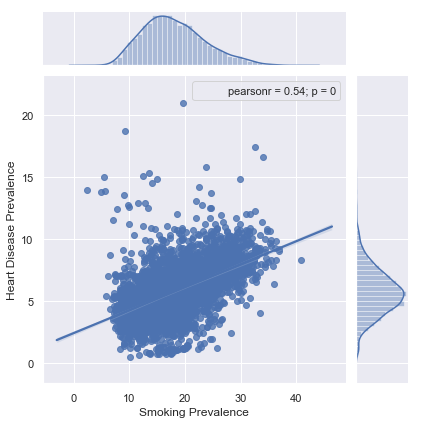

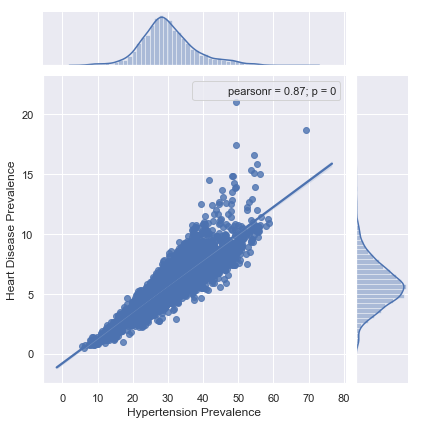

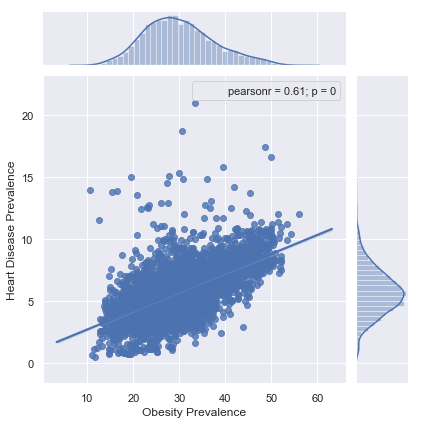

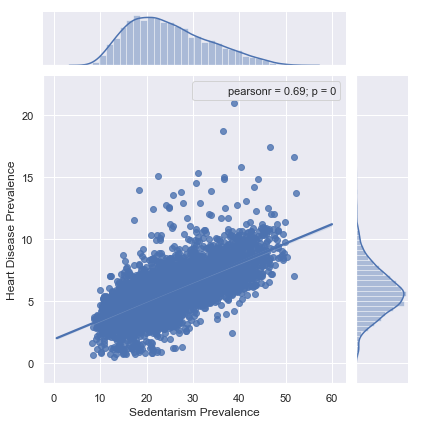

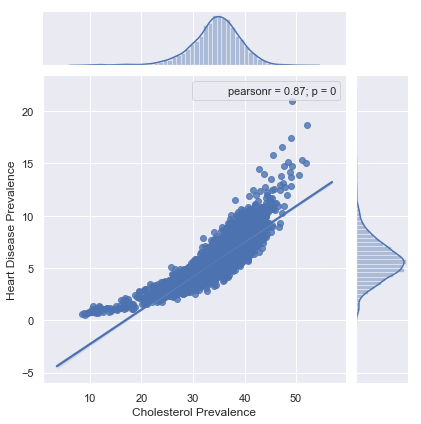

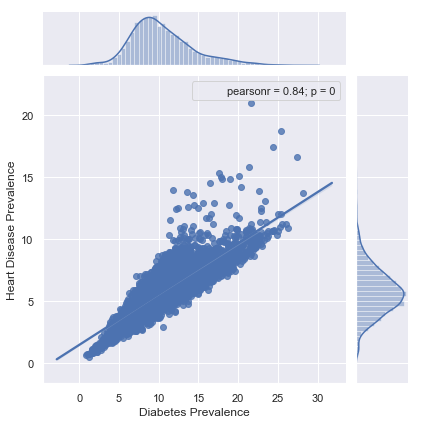

In [28]:
sns.jointplot("Smoking Prevalence","Heart Disease Prevalence",data=heart_prev,kind="reg",stat_func=stats.pearsonr)
plt.show()

sns.jointplot("Hypertension Prevalence","Heart Disease Prevalence",data=heart_prev,kind="reg",stat_func=stats.pearsonr)
plt.show()

sns.jointplot("Obesity Prevalence","Heart Disease Prevalence",data=heart_prev,kind="reg",stat_func=stats.pearsonr)
plt.show()

sns.jointplot("Sedentarism Prevalence","Heart Disease Prevalence",data=heart_prev,kind="reg",stat_func=stats.pearsonr)
plt.show()

sns.jointplot("Cholesterol Prevalence","Heart Disease Prevalence",data=heart_prev,kind="reg",stat_func=stats.pearsonr)
plt.show()

sns.jointplot("Diabetes Prevalence","Heart Disease Prevalence",data=heart_prev,kind="reg",stat_func=stats.pearsonr)
plt.show()

From the joint plots it can be seen that these risk factors are strongly correlated with heart disease prevalence. Hypertension, high cholesterol and diabetes have the strongest correlations.

These are known major risk factors for heart disease so strong correlations are expected.

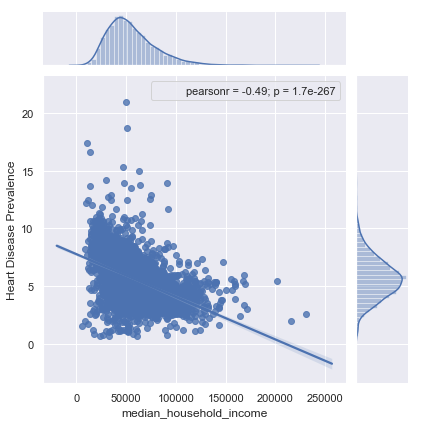

In [29]:
sns.jointplot("median_household_income","Heart Disease Prevalence",data=heart_prev,kind="reg",stat_func=stats.pearsonr)
plt.show()

We see there is a moderate to strong negative correlation between median household income and heart disease prevalence.

One hypothesis is residents of zip codes with an average larger income likely have better access to healthcare, exercise and food options.

#### How is income distributed?

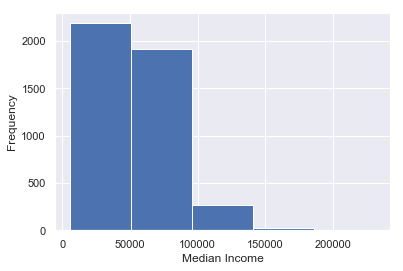

In [30]:
plt.hist(heart_prev["median_household_income"], bins=5)
plt.xlabel("Median Income")
plt.ylabel("Frequency")
plt.show()

We see that most data points fall above and below 50000.

We will separate the data into groups based on this cutoff.

In [31]:
# Create a new column specifying median household income groups

heartprev_copy = heart_prev.dropna()

incomegroups = []
for income in heartprev_copy["median_household_income"]:
    if income <50000:
        incomegroups.append("<50000")
    if income >= 50000:
        incomegroups.append(">=50000")
        
heartprev_copy["Income Group"]= incomegroups

In [32]:
_ = heartprev_copy.groupby("Income Group")["Heart Disease Prevalence"].mean().reset_index()
display(_)

,Income Group,Heart Disease Prevalence
0,<50000,6.540580
1,>=50000,4.959305


We see that the prevalence of heart disease is larger when income is <50000.

We will statistically test the significance of the difference between groups.

## Heart disease and zip code population

#### Is there a correlation between zip code population and heart disease?

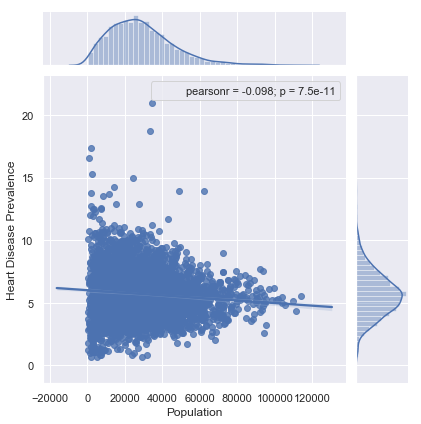

In [33]:
sns.jointplot("Population","Heart Disease Prevalence",data=heart_prev,kind="reg",stat_func=stats.pearsonr)
plt.show()

We see there is a weak negative correlation between zip code population and heart disease prevalence.

This may due to lower incomes in less populated zip codes.

#### Is the difference in heart disease by population due to income?

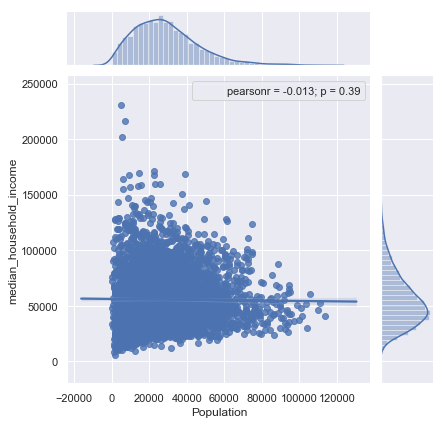

In [34]:
sns.jointplot("Population","median_household_income",data=heart_prev,kind="reg",stat_func=stats.pearsonr)
plt.show()

We see that there is not a significant correlation between population and median household income. It is unlikely that the negative correlation between population and heart disease is due to income.

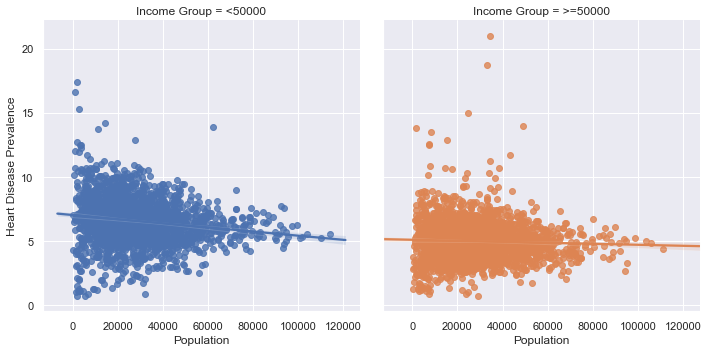

Income Group: <50000
-----------------------------
pearson r and p-value:  (-0.16169560730753946, 9.391991673286615e-14) 

Income Group: >=50000
-----------------------------
pearson r and p-value:  (-0.04340847959287401, 0.03741615575840685) 



In [35]:
sns.lmplot("Population","Heart Disease Prevalence",data=heartprev_copy,fit_reg=True,col="Income Group",hue="Income Group")
plt.show()

igroups = ["<50000",">=50000"]
for group in igroups:
    prev = heartprev_copy.loc[heartprev_copy["Income Group"] == group]
    _ = stats.pearsonr(prev["Population"],prev["Heart Disease Prevalence"])
    print("Income Group: {}".format(group))
    print("-----------------------------")
    print("pearson r and p-value: ", _,"\n")

Additionally, we see that when income group is accounted for, there is still a significant negative correlation between population and heart disease prevalence.

#### How are populations distributed?

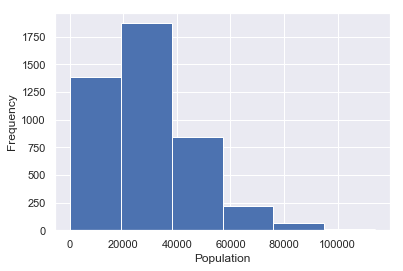

29072.211328480436

In [36]:
plt.hist(heart_prev["Population"], bins=6)
plt.xlabel("Population")
plt.ylabel("Frequency")
plt.show()

heart_prev.Population.mean()

We see that most of the data points represent zip codes with populations less than 60000 with a mean of about 30000.

We will refine population groups to <30000 and >=30000 for comparison of low population and high population zip codes.

In [37]:
# Create a new column specifying population group by size
popgroups = []
for pop in heartprev_copy["Population"]:
    if pop <30000:
        popgroups.append("<30000")
    if pop >=30000:
        popgroups.append(">=30000")
        
heartprev_copy["Population Group"]= popgroups

#### Does the mean prevalence of heart disease differ when examined by population group?

In [38]:
_ = heartprev_copy.groupby("Population Group")["Heart Disease Prevalence"].mean().reset_index()
display(_)

,Population Group,Heart Disease Prevalence
0,<30000,5.843411
1,>=30000,5.535480


We see that there is a difference in the prevalence of heart disease between the two groups.

We can perform statistical testing to examine whether this difference is due to chance.

## Heart disease and restaurant count

#### Is the number of fast food restaurants within a zip code correlated to heart disease?

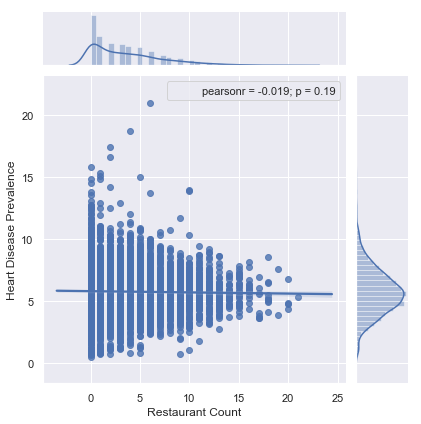

In [39]:
sns.jointplot("Restaurant Count","Heart Disease Prevalence",data=heart_prev,kind="reg",stat_func=stats.pearsonr)
plt.show()

From the plot we see that when viewing all zip codes, there is likely no correlation between a zip code's restaurant count and its heart disease prevalence.

#### Is the number of fast food restaurants correlated to heart disease when examined by population size?

In the following plots we break down the zip codes by population size and plot restuarant count against heart disease prevalence.

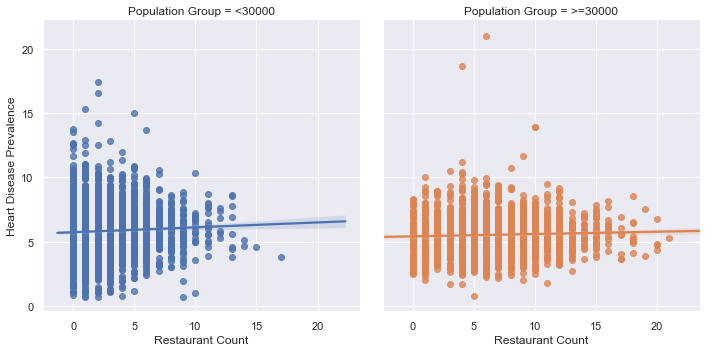

Population Group: <30000
-----------------------------
pearson r and p-value:  (0.05038991636914339, 0.011039806489306121) 

Population Group: >=30000
-----------------------------
pearson r and p-value:  (0.04523066957791395, 0.051570248314069915) 



In [40]:
sns.lmplot("Restaurant Count","Heart Disease Prevalence",data=heartprev_copy,fit_reg=True, 
           col="Population Group", hue="Population Group", col_wrap=2)
plt.show()


pgroups = ["<30000",">=30000"]
for group in pgroups:
    prev = heartprev_copy.loc[heartprev_copy["Population Group"] == group]
    _ = stats.pearsonr(prev["Restaurant Count"],prev["Heart Disease Prevalence"])
    print("Population Group: {}".format(group))
    print("-----------------------------")
    print("pearson r and p-value: ", _,"\n")

We see in populations < 30000 there is a very weak positive correlation.

There is likely no correlation between restaurant count and heart disease in populations >= 30000.

# Inferential Statistics

## Income groups and heart disease

In [41]:
_ = heartprev_copy.groupby("Income Group")["Heart Disease Prevalence"].mean().reset_index()
display(_)

,Income Group,Heart Disease Prevalence
0,<50000,6.540580
1,>=50000,4.959305


We saw that the mean prevalence of heart disease is higher in zip codes with a median household income below 50000.

#### Is the observed difference in the samples due to chance?

*  __Null Hypothesis__: There is no difference in the mean heart disease prevalence between groups.
*  __Alternative Hypothesis__: The mean heart disease prevalence is higher when median household income is <50000.

alpha = 0.05

To test the hypotheses we draw bootstrap samples of both groups and compare the bootstrap difference in means to the observed difference in means.

In [42]:
# Functions to draw bootstrap replicates
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    bs_replicates = np.empty(size)
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)
    return bs_replicates

# Compute the mean of heart disease prevalence
mean_prev = np.mean(heartprev_copy["Heart Disease Prevalence"])

# Separate heart disease prevalence by low and high income
low_income_prev = heartprev_copy[heartprev_copy["Income Group"] == "<50000"]["Heart Disease Prevalence"]
high_income_prev = heartprev_copy[heartprev_copy["Income Group"] == ">=50000"]["Heart Disease Prevalence"]

# Calculate the observed difference in means
empirical_diff_means = np.mean(low_income_prev) - np.mean(high_income_prev)

# Generate shifted arrays
low_income_shifted = low_income_prev - np.mean(low_income_prev) + mean_prev
high_income_shifted = high_income_prev - np.mean(high_income_prev) + mean_prev

# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_l = draw_bs_reps(low_income_shifted, np.mean, size=10000)
bs_replicates_h = draw_bs_reps(high_income_shifted, np.mean, size=10000)

# Get replicates of difference of means
bs_replicates = bs_replicates_l - bs_replicates_h

# Compute and print p-value: 
p = np.sum(bs_replicates >= empirical_diff_means) / len(bs_replicates)
print('p-value =', p)


p-value = 0.0


A p-value close to 0 indicates we reject the null hypothesis. There is a difference in the means of both groups. The alternative hypothesis suggests that the mean heart disease prevalence is higher when median household income is below 50000 in a zip code.

## Population groups and heart disease

In [43]:
_ = heartprev_copy.groupby("Population Group")["Heart Disease Prevalence"].mean().reset_index()
display(_)

,Population Group,Heart Disease Prevalence
0,<30000,5.843411
1,>=30000,5.535480


We saw that the mean prevalence of heart disease is higher in zip codes with a population below 30000.

#### Is the observed difference in the samples due to chance?

*  __Null Hypothesis__: There is no difference in the mean heart disease prevalence between groups.
*  __Alternative Hypothesis__: The mean heart disease prevalence is higher when population < 30000.

alpha = 0.05

To test the hypotheses we draw bootstrap samples of both groups and compare the bootstrap difference in means to the observed difference in means.

In [44]:
# Separate heart disease prevalence by population
low_pop_prev = heartprev_copy[heartprev_copy["Population Group"] == "<30000"]["Heart Disease Prevalence"]
high_pop_prev = heartprev_copy[heartprev_copy["Population Group"] == ">=30000"]["Heart Disease Prevalence"]

# Calculate the observed difference in means
empirical_diff_means = np.mean(low_pop_prev) - np.mean(high_pop_prev)

# Generate shifted arrays
low_pop_shifted = low_pop_prev - np.mean(low_pop_prev) + mean_prev
high_pop_shifted = high_pop_prev - np.mean(high_pop_prev) + mean_prev

# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_l = draw_bs_reps(low_pop_shifted, np.mean, size=10000)
bs_replicates_h = draw_bs_reps(high_pop_shifted, np.mean, size=10000)

# Get replicates of difference of means
bs_replicates = bs_replicates_l - bs_replicates_h

# Compute and print p-value: 
p = np.sum(bs_replicates >= empirical_diff_means) / len(bs_replicates)
print('p-value =', p)


p-value = 0.0


A p-value close to 0 indicates we reject the null hypothesis. There is a difference in the means of both groups. The alternative hypothesis suggests that the mean heart disease prevalence is higher when zip code population is below 30000.

#### Summary

The following features have moderate to strong correlations with heart disease prevalence and will be useful for our model:

1. High cholesterol prevalence
2. Hypertension prevalence
3. Diabetes prevalence
4. Sedentarism prevalence
5. Obesity prevalence
6. Smoking prevalence
7. Median household income
8. Population

Restaurant count per zip code may not be helpful for our model. It has a very weak correlation with heart disease prevalence in populations < 30000.

# In-depth Analysis

The data is split into the target variable, heart disease prevalence (y), and its features (X).

We will use various untuned supervised learning estimators to see which works best by default. We will then tune the top-performing estimators. The metric used for performance will be RMSE and 5-fold cross-validation with be performed.

Training will be performed using 80% of the data, and 20% will be reserved for final evaluation of the model.

In [45]:
# Import split, cross validation, imputer and pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Select features and target variable
X = heart_prev.drop(columns=["Zip Code", "Heart Disease Prevalence","Restaurant Count",
                     "Population Group","Restaurant Group"])
y = heart_prev[["Heart Disease Prevalence"]]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
# Set an imputer to fill missing values with the mean of the column
imp = SimpleImputer(strategy="mean")

### Linear Regression

In [47]:
from sklearn.linear_model import LinearRegression

est = LinearRegression()
steps = [('Imputation',imp), ("Estimator",est)]
pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)

cv_scores= cross_val_score(pipeline, X_train, y_train, cv=5, scoring="neg_mean_squared_error")
cv_scores = np.sqrt(cv_scores * -1)

scores = dict()
scores["Linear Regression"] = np.mean(cv_scores)

print("Linear Regression cross validation scores:")
for score in cv_scores:
    print(score)
    
print("\nAverage Score on 5-Folds: ", scores["Linear Regression"])

Linear Regression cross validation scores:
0.7640016006457158
0.616391616918767
0.7173613585882987
0.6456242575199455
0.599923604638814

Average Score on 5-Folds:  0.6686604876623082


### Lasso Regression

In [48]:
from sklearn.linear_model import Lasso

est = Lasso(random_state=42)
steps = [('Imputation',imp), ("Estimator",est)]
pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)

cv_scores= cross_val_score(pipeline, X_train, y_train, cv=5, scoring="neg_mean_squared_error")
cv_scores = np.sqrt(cv_scores * -1)

scores["Lasso Regression"] = np.mean(cv_scores)

print("Lasso Regression cross validation scores:")
for score in cv_scores:
    print(score)
    
print("\nAverage Score on 5-Folds: ", scores["Lasso Regression"])

Lasso Regression cross validation scores:
0.8907985229596318
0.6856086049982978
0.8412855240670011
0.7146179925453434
0.6835626169733958

Average Score on 5-Folds:  0.7631746523087339


### Ridge Regressor

In [49]:
from sklearn.linear_model import Ridge

est = Ridge(random_state=42)
steps = [('Imputation',imp), ("Estimator",est)]
pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)

cv_scores= cross_val_score(pipeline, X_train, y_train, cv=5, scoring="neg_mean_squared_error")
cv_scores = np.sqrt(cv_scores * -1)

scores["Ridge Regression"] = np.mean(cv_scores)

print("Ridge Regression cross validation scores:")
for score in cv_scores:
    print(score)
    
print("\nAverage Score on 5-Folds: ", scores["Ridge Regression"])

Ridge Regression cross validation scores:
0.7640051016423387
0.6163893851233473
0.7173626213449562
0.6456231419656402
0.5999204163478954

Average Score on 5-Folds:  0.6686601332848354


### Decision Tree

In [50]:
from sklearn import tree

est = tree.DecisionTreeRegressor(max_depth=6, random_state=42)
steps = [('Imputation',imp), ("Estimator",est)]
pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)

cv_scores= cross_val_score(pipeline, X_train, y_train, cv=5, scoring="neg_mean_squared_error")
cv_scores = np.sqrt(cv_scores * -1)

scores["Decision Tree"] = np.mean(cv_scores)

print("Decision Tree cross validation scores:")
for score in cv_scores:
    print(score)
    
print("\nAverage Score on 5-Folds: ", scores["Decision Tree"])

Decision Tree cross validation scores:
0.7499448129814535
0.7102485303215036
0.8044003891453831
0.6791831296908507
0.6863891261764681

Average Score on 5-Folds:  0.7260331976631318


### Random Forest

In [51]:
from sklearn.ensemble import RandomForestRegressor

est = RandomForestRegressor(random_state=42)
steps = [('Imputation',imp), ("Estimator",est)]
pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)

cv_scores= cross_val_score(pipeline, X_train, y_train, cv=5, scoring="neg_mean_squared_error")
cv_scores = np.sqrt(cv_scores * -1)

scores["Random Forest"] = np.mean(cv_scores)

print("Random Forest cross validation scores:")
for score in cv_scores:
    print(score)
    
print("\nAverage Score on 5-Folds: ", scores["Random Forest"])

Random Forest cross validation scores:
0.6681219142487355
0.5667972630205025
0.6558352025125624
0.5864388808791253
0.5958390142506603

Average Score on 5-Folds:  0.6146064549823173


### Adaptive Boost Regressor

In [52]:
from sklearn.ensemble import AdaBoostRegressor

trees = tree.DecisionTreeRegressor(max_depth=6, random_state=42)

est = AdaBoostRegressor(base_estimator=trees, random_state=42)
steps = [('Imputation',imp), ("Estimator",est)]
pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)

cv_scores= cross_val_score(pipeline, X_train, y_train, cv=5, scoring="neg_mean_squared_error")
cv_scores = np.sqrt(cv_scores * -1)

scores["AdaBoost"] = np.mean(cv_scores)

print("AdaBoost cross validation scores:")
for score in cv_scores:
    print(score)
    
print("\nAverage Score on 5-Folds: ", scores["AdaBoost"])

AdaBoost cross validation scores:
0.6704010809254741
0.5912351239896717
0.7043546371891471
0.6010123956946263
0.5969350114572188

Average Score on 5-Folds:  0.6327876498512277


### Gradient Boost Regressor

In [53]:
from sklearn.ensemble import GradientBoostingRegressor

est = GradientBoostingRegressor(random_state=42)
steps = [('Imputation',imp), ("Estimator",est)]
pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)

cv_scores= cross_val_score(pipeline, X_train, y_train, cv=5, scoring="neg_mean_squared_error")
cv_scores = np.sqrt(cv_scores * -1)

scores["Gradient Boost Regressor"] = np.mean(cv_scores)

print("Gradient Boost Regressor cross validation scores:")
for score in cv_scores:
    print(score)
    
print("\nAverage Score on 5-Folds: ", scores["Gradient Boost Regressor"])

Gradient Boost Regressor cross validation scores:
0.6470218110627873
0.5626663565701054
0.6147973152554178
0.565463070239759
0.58506549122935

Average Score on 5-Folds:  0.5950028088714839


### Elastic Net

In [54]:
from sklearn.linear_model import ElasticNet

est = ElasticNet()
steps = [('Imputation',imp), ("Estimator",est)]
pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)

cv_scores= cross_val_score(pipeline, X_train, y_train, cv=5, scoring="neg_mean_squared_error")
cv_scores = np.sqrt(cv_scores * -1)

scores["Elastic Net"] = np.mean(cv_scores)

print("Elastic Net cross validation scores:")
for score in cv_scores:
    print(score)
    
print("\nAverage Score on 5-Folds: ", scores["Elastic Net"])

Elastic Net cross validation scores:
0.864086471141114
0.6620291616479348
0.8038975340387999
0.6933738349128078
0.6612875130534176

Average Score on 5-Folds:  0.7369349029588148


### Summary of un-tuned scores

A gradient boost regressor had the best default performance at 0.595 RMSE. The random forest performed similarly well at 0.615 RMSE. Both estimators should be evaluated for improved performance through tuning.

In [55]:
scores = sorted(scores.items(), key= lambda score: score[1], reverse=False)
for k,v in scores:
    print(k,": ",v)

Gradient Boost Regressor :  0.5950028088714839
Random Forest :  0.6146064549823173
AdaBoost :  0.6327876498512277
Ridge Regression :  0.6686601332848354
Linear Regression :  0.6686604876623082
Decision Tree :  0.7260331976631318
Elastic Net :  0.7369349029588148
Lasso Regression :  0.7631746523087339


## Hyperparamenter Tuning

The top two performing estimators, gradient boost and random forests, will be tuned and re-evaluated using RMSE scoring.

### Tuned Gradient Boost Regression

In [56]:
from sklearn.model_selection import GridSearchCV

steps = [("Imputation",imp),("GBR", GradientBoostingRegressor(random_state=42))]
pipeline = Pipeline(steps)

params = {"GBR__n_estimators":[100, 200, 500],
          "GBR__max_depth":[3, 5]}

cv = GridSearchCV(pipeline, param_grid=params, cv=5, scoring="neg_mean_squared_error")
cv.fit(X_train, y_train)

cv_param = cv.best_params_
cv_score = np.sqrt(cv.best_score_ * -1)

print("Best parameters:\n---------------")
for k,v in cv_param.items():
    print(k,": ",v)
print("\nBest score: ", cv_score)

Best parameters:
---------------
GBR__max_depth :  3
GBR__n_estimators :  500

Best score:  0.5839790648596442


### Tuned Random Forest

In [57]:
steps = [("Imputation",imp),("forest", RandomForestRegressor(random_state=42))]
pipeline = Pipeline(steps)

params = {"forest__n_estimators": [1, 5, 10, 50, 100, 200],
          "forest__max_depth": [3, 5, 7]}
 
cv = GridSearchCV(pipeline, param_grid=params, cv=5, scoring="neg_mean_squared_error")
cv.fit(X_train, y_train)

cv_param = cv.best_params_
cv_score = np.sqrt(cv.best_score_ * -1)

print("Best parameters:\n---------------")
for k,v in cv_param.items():
    print(k,": ",v)
print("\nBest score: ", cv_score)

Best parameters:
---------------
forest__max_depth :  7
forest__n_estimators :  100

Best score:  0.6132378650737339


Gradient boost regression provides the best score before and after tuning, with a final RMSE of 0.584.

## Feature importance

Now we examine which features provide the most predictive value for the model using Mutual Information scoring.

In [58]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

kbest=SelectKBest(score_func=mutual_info_regression, k=5)

steps = [("Imputation",imp),("Select K Best",kbest)]
pipeline = Pipeline(steps)

pipeline.fit(X, y)

feature_names = X.columns
feature_scores = list(zip(feature_names, kbest.scores_))

feature_scores.sort(key=lambda x:x[1], reverse=True)

for f,s in feature_scores:
    print(f,": ",s*100)

Hypertension Prevalence :  90.77391590361641
Cholesterol Prevalence :  90.7381582465927
Diabetes Prevalence :  82.40873048609627
Sedentarism Prevalence :  36.31424280113569
median_household_income :  32.195373421298434
Obesity Prevalence :  28.59192804863877
Smoking Prevalence :  26.30271018326651
Population :  12.924736634020917


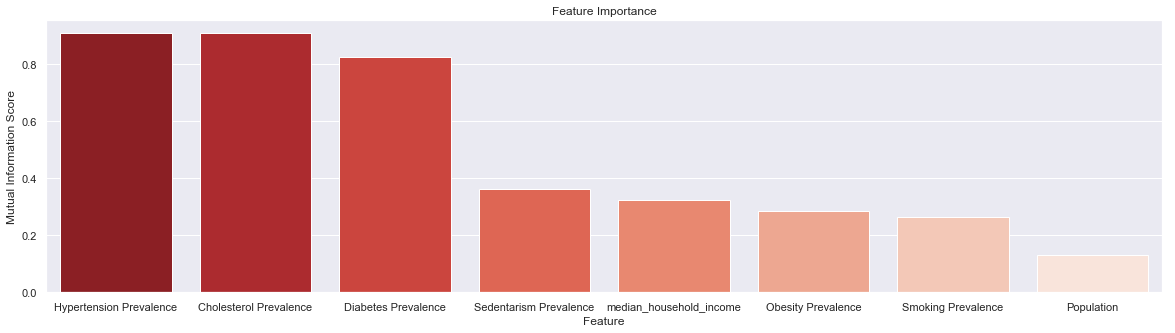

In [59]:
feature = []
score = []
for f,s in feature_scores:
    feature.append(f)
    score.append(s)
    
plt.subplots(figsize=(20,5))
plot = sns.barplot(feature, score, palette="Reds_r")
plot.set(title="Feature Importance",xlabel="Feature",ylabel="Mutual Information Score",)
plt.show()

Heart disease's well-known risk factors are the strongest predictors as expected. Median household income is approximately as strong of a predictor as well-known risk factors, smoking and obesity. Population contributes minimally to prediction.

## Final Model

In [60]:
gbr = GradientBoostingRegressor(random_state=42, n_estimators=500, max_depth=3)

steps = [("Imputation",imp),("Estimator",gbr)]
pipeline = Pipeline(steps)

pipeline.fit(X_train, y_train)

y_pred_train = pipeline.predict(X_train)
y_pred_test = pipeline.predict(X_test)

train_r2 = pipeline.score(X_train, y_train)
train_rmse = np.sqrt(mean_squared_error(y_train,y_pred_train))

test_r2 = pipeline.score(X_test, y_test)
test_rmse = np.sqrt(mean_squared_error(y_test,y_pred_test))


print("Training set R2: {}".format(train_r2*100))
print("Training set RMSE: {}".format(train_rmse))
print("\n")
print("Test set R2: {}".format(test_r2*100))
print("Test set RMSE: {}".format(test_rmse))

Training set R2: 96.31533870972207
Training set RMSE: 0.3727566351563874


Test set R2: 89.91391360067519
Test set RMSE: 0.5919690982490107


The model shows good R2 and RMSE scores on both the training and the test sets. This model is expected to perform well on other unseen data.

## Recommendation

The model examines the impact of two socioeconomic factors (household income and population) on disease prevalence. This model can be taken further by incorporating other socioeconomic features such distance and means of transportation to work, education levels and home values.

Additionally, the model may also provide more insight using an updated dataset for fast food restaurant locations within the US.